# HW 1

Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. The **objective** of this assignment is to help you familiarize w python packages related to machine learning, namely scikit-learn package.  

**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**

## Instructions

This assignment covers several aspects of KNN Classifier and performence evaluation we have covered in [introML](https://git.txstate.edu/ML/2023Fall/tree/main/practice/introML) module. eep the following in mind:
* Structure your [notebook](https://git.txstate.edu/ML/2023Fall/blob/master/tutorials/notebook-checklist.md) cells as sugested
* **Q** - QUESTION posted in a markdown cell
   * it explains the task in details
   * it is marked with **Q1**, ... **Q10** ...  
* **A** - Marks the location where you need to enter your answer below
   * it can be ```python code``` (more often) or markdown cell (less often)
   * it is marked with **A1**, ... **A10** ... and you enter your answers **below**
   * make sure the cell is running and produces no errors 
* Before you submit the HW: 
  * Make sure your notebook can always be rerun from top to bottom.

* Follow instructions given in canvas for homework submission.


## Tutorials

* [KNN with sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* [Plot Confursion Matrix with Sklearn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)

# 1. CLASSIFICATION USING KNN ALGORITHM

**Data**  is in the ../data/ folder, and datafile name is [heart.dat](../data/heart.dat)
**Keep** the relative path from **HW** folder to **data** folder in your submission e.g. you will access the file as [../data/heart.dat](../data/heart.dat)


**Q1**
use pandas to read ../data/heart.dat
* NOTE : use separator as space while reading this data
* Use column names from metadata in given order
* NOTE : YOU WON'T SEE 'PRESENCE' in metadata (in attribute information)


**A1**
Replace the ? mark with your answer

In [55]:
import pandas as pd

columns = [ 'age', 'sex', 'cp', 'restbp', 'chol', 'fastbs', 'restecg', 'maxhr', 'exang', 'oldpeak', 'slope', 'vcflour', 'thal' ]

df = pd.read_csv( '../data/heart.dat', sep=' ', names=columns )

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 70.0 to 67.0
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      270 non-null    float64
 1   sex      270 non-null    float64
 2   cp       270 non-null    float64
 3   restbp   270 non-null    float64
 4   chol     270 non-null    float64
 5   fastbs   270 non-null    float64
 6   restecg  270 non-null    float64
 7   maxhr    270 non-null    float64
 8   exang    270 non-null    float64
 9   oldpeak  270 non-null    float64
 10  slope    270 non-null    float64
 11  vcflour  270 non-null    float64
 12  thal     270 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 29.5 KB


**Q2**
1. Have a look at head and tail of your data
* N.B: You can use .tail and .head methods
* N.B: Print both of them, if you just run ```without printing``` only output from last command will be printed
2. Let us view the size of dataset as well
* print data shape
3. Now let us see if there is some missing value
4. If there is any na values drop it

**N.B** You can add more cells as per your need.

**A2** Replace ??? with code in the code cell below

In [56]:
# Code goes below
df.head()

df.tail()

df.shape

df.isna()

df.dropna()

age  sex     cp  restbp  chol  fastbs  restecg  maxhr  exang  oldpeak  \
70.0  1.0  4.0  130.0   322.0   0.0     2.0    109.0    0.0    2.4      2.0   
67.0  0.0  3.0  115.0   564.0   0.0     2.0    160.0    0.0    1.6      2.0   
57.0  1.0  2.0  124.0   261.0   0.0     0.0    141.0    0.0    0.3      1.0   
64.0  1.0  4.0  128.0   263.0   0.0     0.0    105.0    1.0    0.2      2.0   
74.0  0.0  2.0  120.0   269.0   0.0     2.0    121.0    1.0    0.2      1.0   
...   ...  ...    ...     ...   ...     ...      ...    ...    ...      ...   
52.0  1.0  3.0  172.0   199.0   1.0     0.0    162.0    0.0    0.5      1.0   
44.0  1.0  2.0  120.0   263.0   0.0     0.0    173.0    0.0    0.0      1.0   
56.0  0.0  2.0  140.0   294.0   0.0     2.0    153.0    0.0    1.3      2.0   
57.0  1.0  4.0  140.0   192.0   0.0     0.0    148.0    0.0    0.4      2.0   
67.0  1.0  4.0  160.0   286.0   0.0     2.0    108.0    1.0    1.5      2.0   

      slope  vcflour  thal  
70.0    3.0      3.0     2  
67.0    0.0      7.0     1  
57.0    0.0      7.0     2  
64.0    1.0      7.0     1  
74.0    1.0      3.0     1  
...     ...      ...   ...  
52.0    0.0      7.0     1  
44.0    0.0      7.0     1  
56.0    0.0      3.0     1  
57.0    0.0      6.0     1  
67.0    3.0      3.0     2  

[270 rows x 13 columns]

**Q3** Now we will look deeper into the dataset
* Use pairplot from sns to plot this data frame
* See the statistics of the data by describing dataframe

**A3** Replace ??? with code in the code cell below

c:\Users\Isaac\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


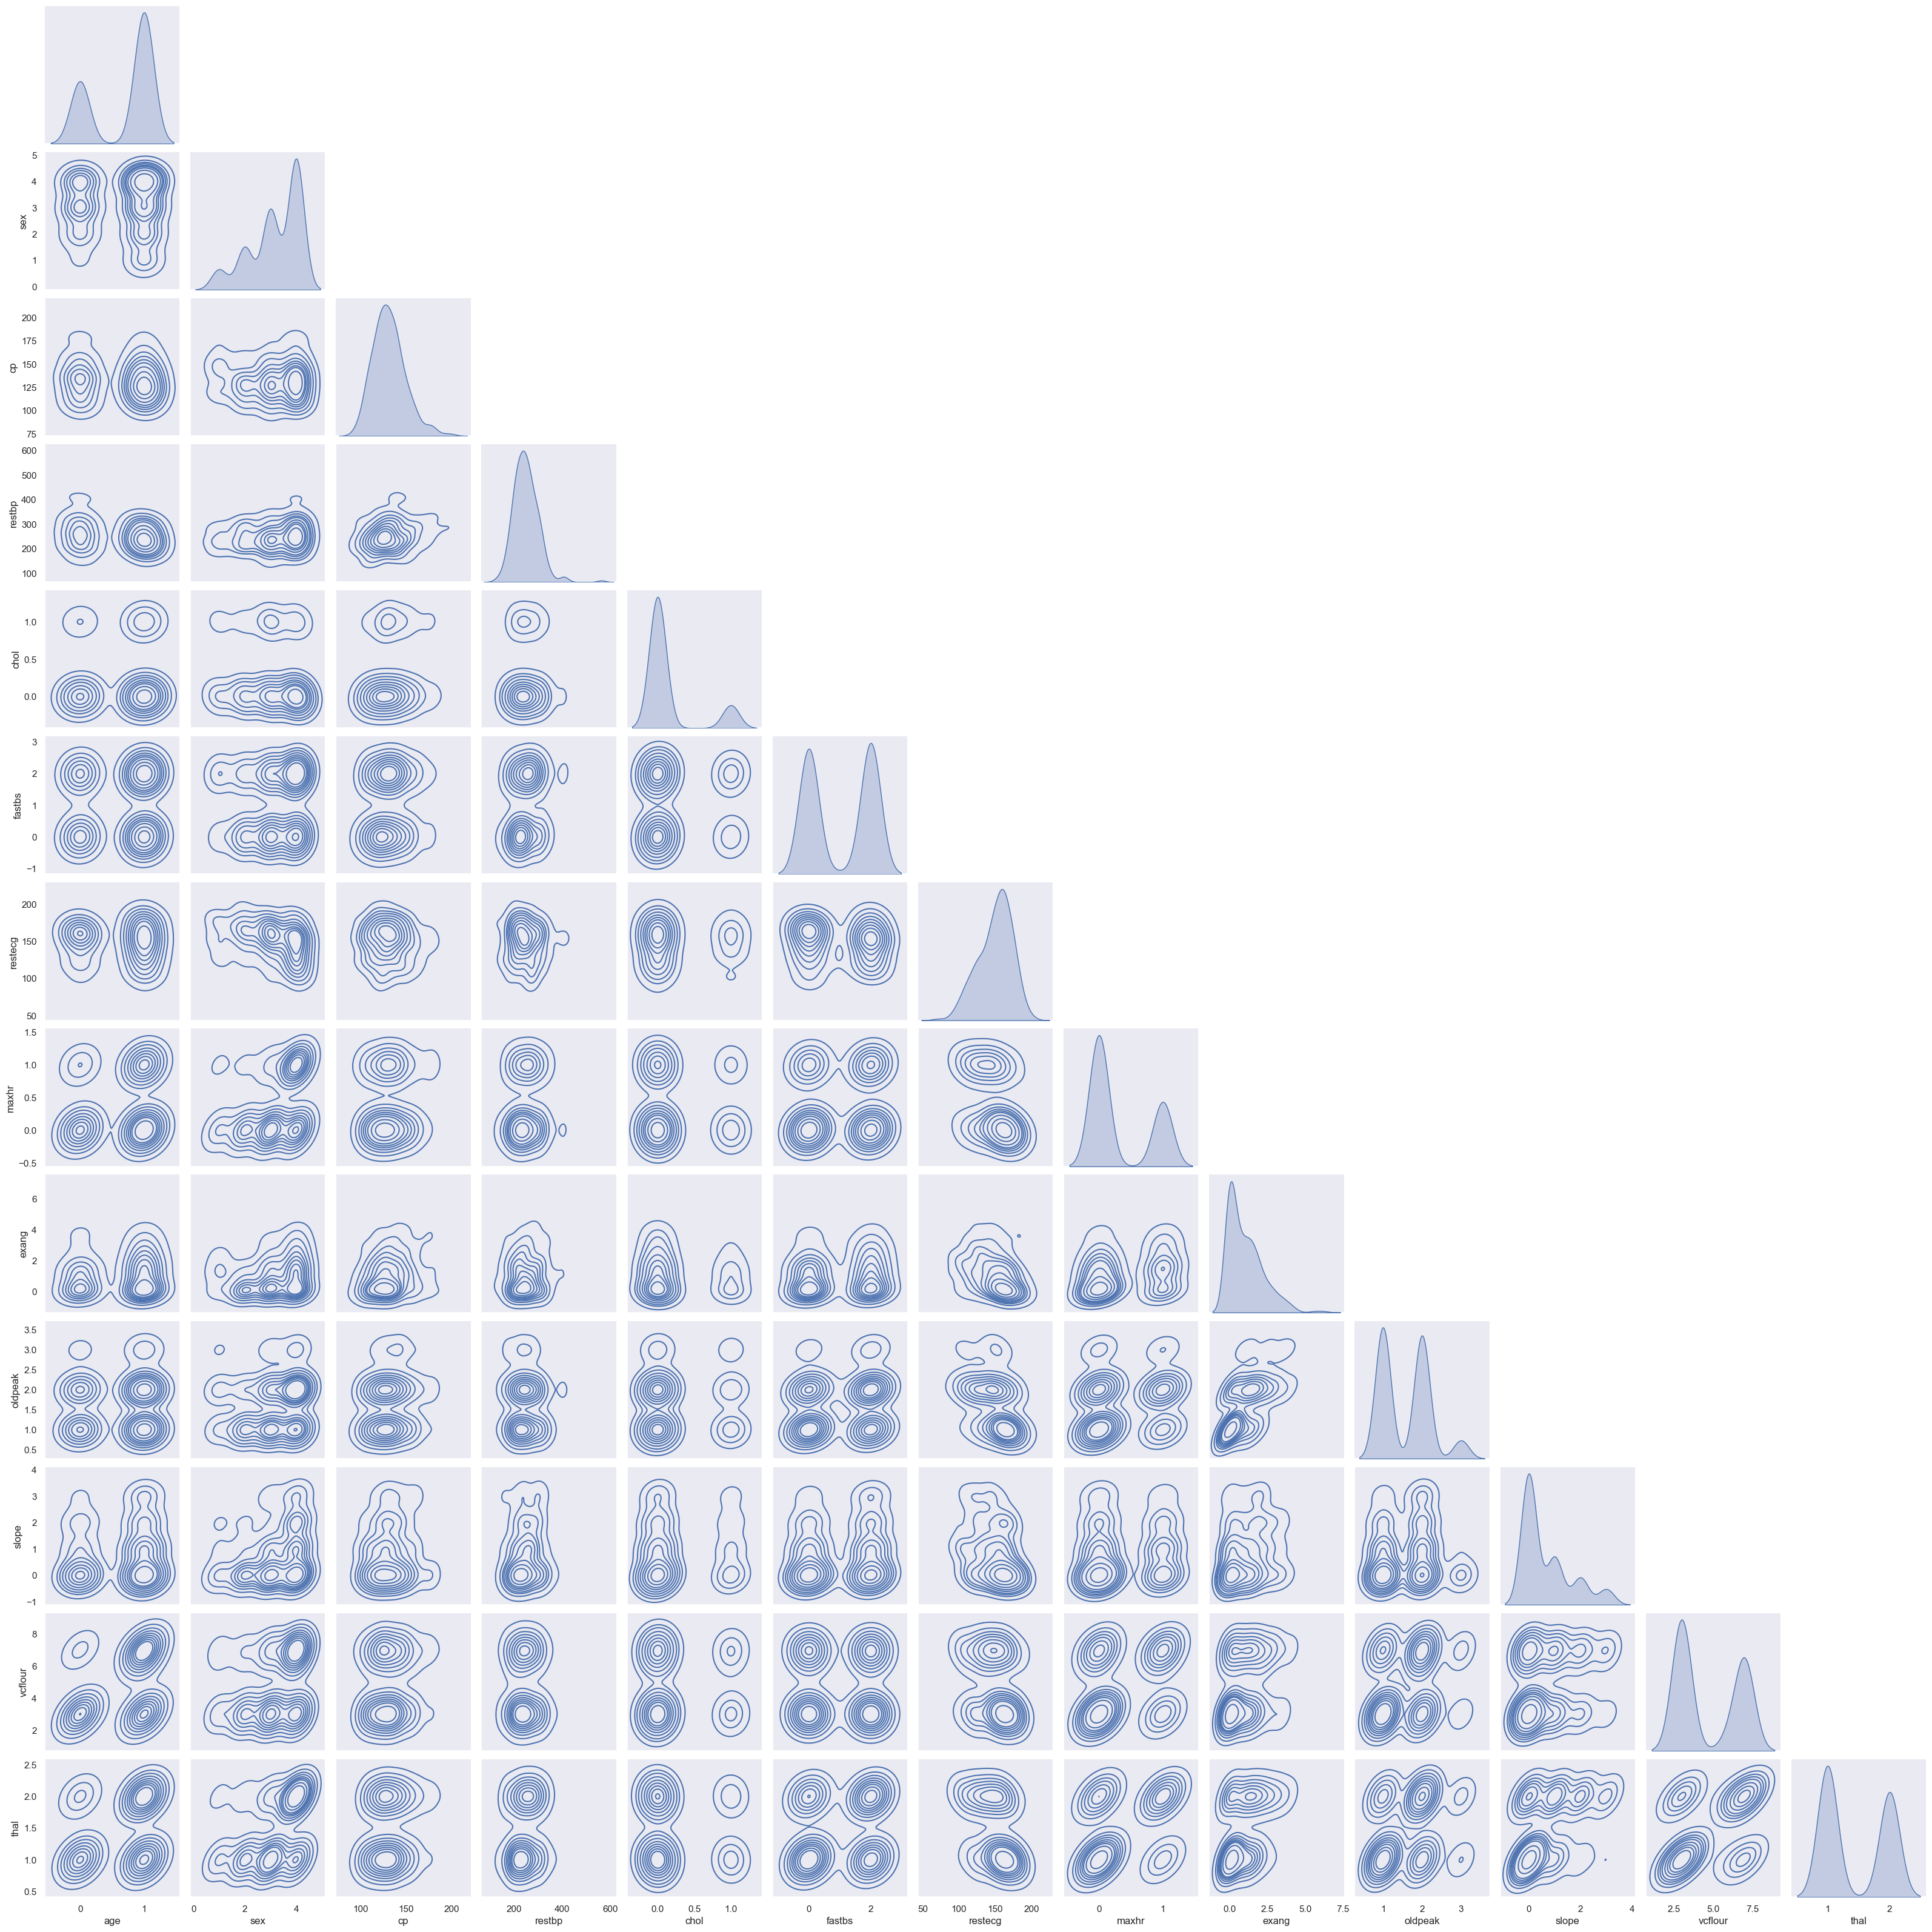

age         sex          cp      restbp        chol      fastbs  \
count  270.000000  270.000000  270.000000  270.000000  270.000000  270.000000   
mean     0.677778    3.174074  131.344444  249.659259    0.148148    1.022222   
std      0.468195    0.950090   17.861608   51.686237    0.355906    0.997891   
min      0.000000    1.000000   94.000000  126.000000    0.000000    0.000000   
25%      0.000000    3.000000  120.000000  213.000000    0.000000    0.000000   
50%      1.000000    3.000000  130.000000  245.000000    0.000000    2.000000   
75%      1.000000    4.000000  140.000000  280.000000    0.000000    2.000000   
max      1.000000    4.000000  200.000000  564.000000    1.000000    2.000000   

          restecg       maxhr      exang     oldpeak       slope     vcflour  \
count  270.000000  270.000000  270.00000  270.000000  270.000000  270.000000   
mean   149.677778    0.329630    1.05000    1.585185    0.670370    4.696296   
std     23.165717    0.470952    1.14521    0.614390    0.943896    1.940659   
min     71.000000    0.000000    0.00000    1.000000    0.000000    3.000000   
25%    133.000000    0.000000    0.00000    1.000000    0.000000    3.000000   
50%    153.500000    0.000000    0.80000    2.000000    0.000000    3.000000   
75%    166.000000    1.000000    1.60000    2.000000    1.000000    7.000000   
max    202.000000    1.000000    6.20000    3.000000    3.000000    7.000000   

             thal  
count  270.000000  
mean     1.444444  
std      0.497827  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [69]:
import seaborn as sns

sns.set( style='dark', color_codes=True )
g = sns.pairplot( data=df, kind='kde', diag_kind='kde', corner=True )

import matplotlib.pyplot as plt
plt.show( g )

#describe dataframe
df.describe()

**Q4** 

1. From the above pairplot what kind of relationship we can derive between age and heartrate?

**A4** Write your answer here......There does not appear to be a relationship between these 2 categories. Chart appears to be 4 dots with one in each corner.

**Q5** If you go through metadata (heart.doc) (Attribute Information:) you will see that all data in our dataframe are not of same types.
* So we should deal them accordingly.  
* We don't have to do anything to 'real' data. However we have to deal with ordered data and nominal data  
* We only need to convert all nominal and ordered data to dummy variables 

**A5** Replace ??? with code in the code cell below


In [74]:
dummy_list = [ 'age', 'sex', 'cp', 'restbp', 'chol', 'fastbs', 'restecg', 'maxhr', 'exang', 'oldpeak', 'slope', 'vcflour', 'thal' ]
df = pd.get_dummies( df, columns=dummy_list, prefix=dummy_list, prefix_sep='-')
df.head()

age-0.0  age-1.0  sex-1.0  sex-2.0  sex-3.0  sex-4.0  cp-94.0  cp-100.0  \
70.0    False     True    False    False    False     True    False     False   
67.0     True    False    False    False     True    False    False     False   
57.0    False     True    False     True    False    False    False     False   
64.0    False     True    False    False    False     True    False     False   
74.0     True    False    False     True    False    False    False     False   

      cp-101.0  cp-102.0  ...  oldpeak-3.0  slope-0.0  slope-1.0  slope-2.0  \
70.0     False     False  ...        False      False      False      False   
67.0     False     False  ...        False       True      False      False   
57.0     False     False  ...        False       True      False      False   
64.0     False     False  ...        False      False       True      False   
74.0     False     False  ...        False      False       True      False   

      slope-3.0  vcflour-3.0  vcflour-6.0  vcflour-7.0  thal-1  thal-2  
70.0       True         True        False        False   False    True  
67.0      False        False        False         True    True   False  
57.0      False        False        False         True   False    True  
64.0      False        False        False         True    True   False  
74.0      False         True        False        False    True   False  

[5 rows x 345 columns]

## KNN Model from sklearn

**Q6** Get training data from the dataframe
1. Assign values of ```presence``` column to y, note you have to use .values method
2. Drop 'presence' column from data frame,
3. Assign df values to x

Split dataset into train and test data use train_test_split
1. Use stratify = y and test_size = 0.25 and random_state = 123
2. Create a KNN model using sklearn library, ```Initialize n_neighbors = 4```, ```(See the documenttaion for details)```
3. Fit the model with the train data 

**A6** Replace ??? with code in the code cell below

In [75]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# Assign values of ```presence``` column to y, note you have to use .values method
y = ??
# Drop 'presence' column from data frame,
df.??
# Assign df values to x
x = ??
# View shape of x and y
x.shape, y.shape

# Use stratify = y and test_size = 0.25 and random_state = 123

xtrain, xtest, ytrain, ytest = ?

# Create a KNN model using sklearn library, k=4 
knn = ??

# Fit the model with the train data
knn.fit(?, ?)

SyntaxError: invalid syntax (387525554.py, line 5)

**Q7** 
_Analysis_
* Predict xtest and view first 20 predicitons
* Compare prediction with real ytest 20 predictions
* Print the score with test data

The way we fit the dataset is not good  
_Normalization_
* rescale only real value columns
* For each column normalize ```df[col] as (x - mean) / standard_deviation```

**A7** Replace ??? with code in the code cell below

In [ ]:
#  Predict xtest and view first 25 predicitons
print(knn.predict(?)[?:?])

# Compare prediction with real ytest 25 predictions
print(?[?:?])

# Print the score with test data
print(knn.score(?, ?))

#rescale only real value columns
realcols = ??

# For each column normalize ```df[col] as (x - mean) / standard_deviation```
for col in ??:
  mean = df[col].?
  std = ??
  df[col] = ??

**Q8** Write the code to train new model using KNN classifier, k=4 (same as above)

**A8** Replace ??? with code in the code cell below

In [ ]:
# update x
x = ?

# Train test Split
xtrain, xtest, ytrain, ytest = ??

# Model Initialization
knn = ??

# Model fitting with training data
knn.fit(?, ?)

# Now print score on test data
knn.score(?, ?)

**Q9** Lets analyze the difference between two modeling strategies (data normalization)  Compare score with and without data normalization process and explain

**A9**  
Write your answer replacing this line

**Q10** Now we will write a function that will initialize, fit and return score on test data for given values of k and Plot result  

1. Use values from 1 to 25(inclusive) and get score and plot as a line graph
* Hint : For advance method you can use map (recall functional programming from last exercise) or you can use simple loops

2. Finally you can print the best value of k by getting the index   
* N.B: Note index starts with 0 but values of k starts with 1 so actual value of k will be 1 more  
* You can use ```np.argmax()``` function  

3. Now define your best model as bestknn and print score

**A10** Write the code below (replace??)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def returnScore(k, xtrain, xtest, ytrain, ytest):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(??, ??)
  return knn.score(??, ??)


result = [*map(lambda i:returnScore(i,??, ??, ??, ??), range(?,?))]
print(result)
plt.plot(result)


print('BESt VALUE OF K',np.argmax(result) + 1 )


bestknn = ?

bestknn.fit(??)
bestknn.score(??)


ypred = bestknn.?
matrix = confusion_matrix(?)
print(matrix)

**Q11** Now plot confusion matrix using [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html), for xtest data. Use the Best KNN model from the above question as the estimator. See [Visualization with Display Objects](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html) example. 

**A11** Replace ??? with code in the code cell below

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = ConfusionMatrixDisplay.?

plt.title("Best KNN Model - Confusion Matrix")
plt.xticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.yticks(range(2), ["Class 1","Class 2"], fontsize=16)
plt.show()

**Q12:** 
1. Calculate the test MSE 
2. Get the score from the model using test data
3. Plot Precision-Recall Curve from the true & predicted test data (Use sklearn PrecisionRecallDisplay)

**A12** Replace ??? with code in the code cell below

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

mse = mean_squared_error(?)          # Calculate the test MSE
print("Test mean squared error (MSE): {:.2f}".format(mse))

print(bestknn.score(?))


PrecisionRecallDisplay.?
plt.show()

## Further reading

* [KNN model creation](https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a)
* [Example of KNN](https://github.com/a-martyn/ISL-python/blob/master/Notebooks/ch4_classification_applied.ipynb)

## Submission Instructions

 1. Run all cells in  `HW1.ipynb` and make sure there are no errors
 2. Print `HW1.ipynb` to pdf file
 3. Create a Folder HW0 and Upload `HW1.ipynb` and `HW1.pdf` files to your git repo allocated for this course e.g: https://git.txstate.edu/NetID/netid before the deadline. Make Sure Instructor and TA has access for the repo.
